In [2]:
from google.colab import files

uploaded = files.upload()


Saving train.csv to train (1).csv


In [3]:
from google.colab import files

uploaded = files.upload()

Saving test.csv to test.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [5]:
df = pd.read_csv("train.csv")


In [6]:
print("Shape of dataset:", df.shape)
df.info()


Shape of dataset: (1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non

In [8]:
missing=df.isnull().sum()
missing=missing[missing>0].sort_values(ascending=False)
missing_df=pd.DataFrame({
    'Feature':missing.index,
    'Missing Values':missing.values
})
missing_df.head(10)

,Feature,Missing Values
0,PoolQC,1453
1,MiscFeature,1406
2,Alley,1369
3,Fence,1179
4,MasVnrType,872
5,FireplaceQu,690
6,LotFrontage,259
7,GarageType,81
8,GarageYrBlt,81
9,GarageFinish,81


In [9]:
!pip install seaborn


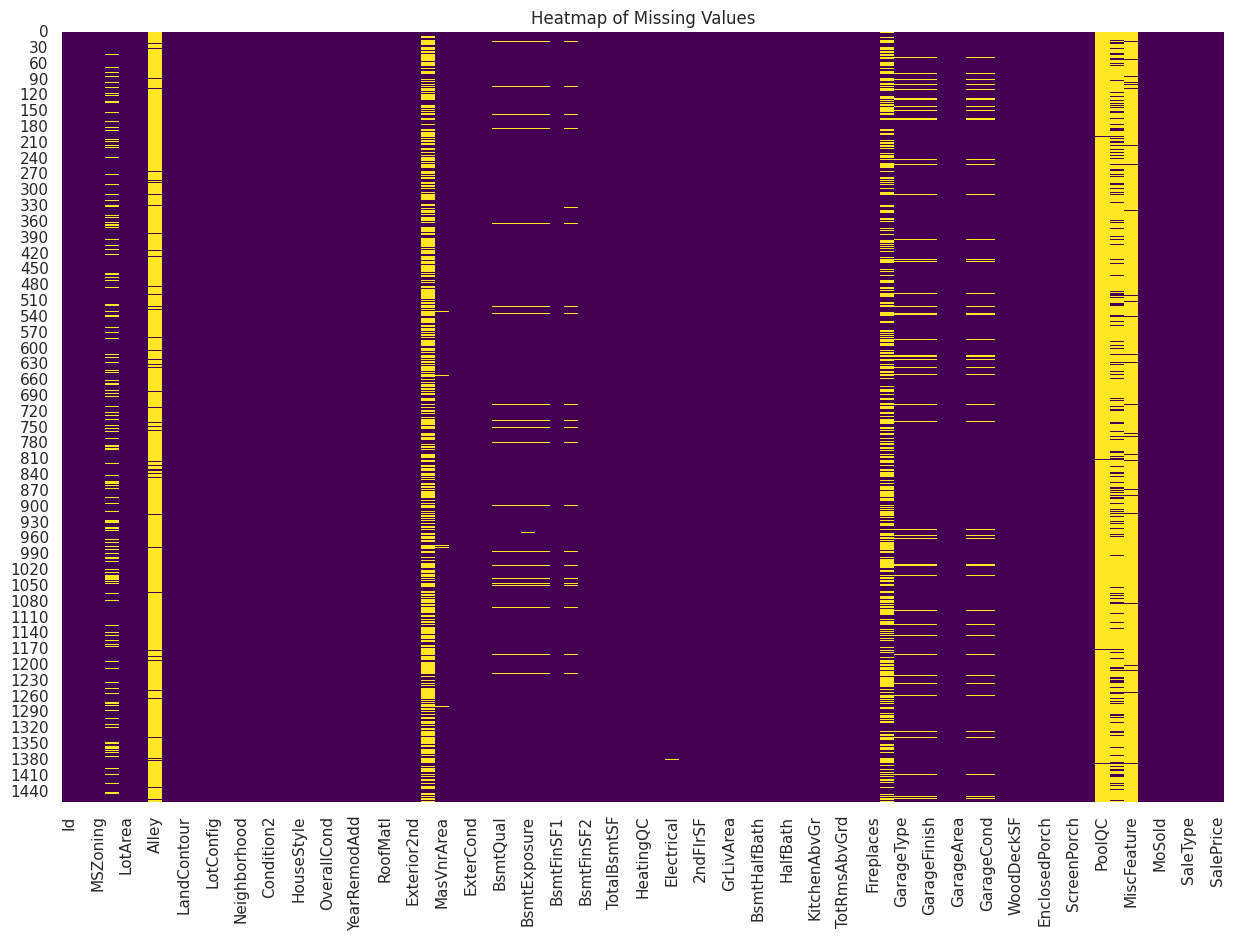

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(15, 10))

# Create a heatmap of missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

# Add a title
plt.title("Heatmap of Missing Values")

# Show the plot
plt.show()


In [12]:
threshold=0.8
missing_ratio=df.isnull().mean()
cols_to_drop=missing_ratio[missing_ratio>threshold].index
df.drop(columns=cols_to_drop,inplace=True)

print(f"Dropped columns: {list(cols_to_drop)}")

Dropped columns: ['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [14]:
# Fill with median or default values
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrType'] = df['MasVnrType'].fillna("None")
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

# Fill all categorical missing values with "None"
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna("None")

# Fill all numeric missing values with 0
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(0)


In [15]:
print("Any missing values left?", df.isnull().sum().sum())


Any missing values left? 0


In [17]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Get top 10 features most correlated with SalePrice
top_corr_features = corr_matrix['SalePrice'].sort_values(ascending=False).head(10)
print(top_corr_features)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


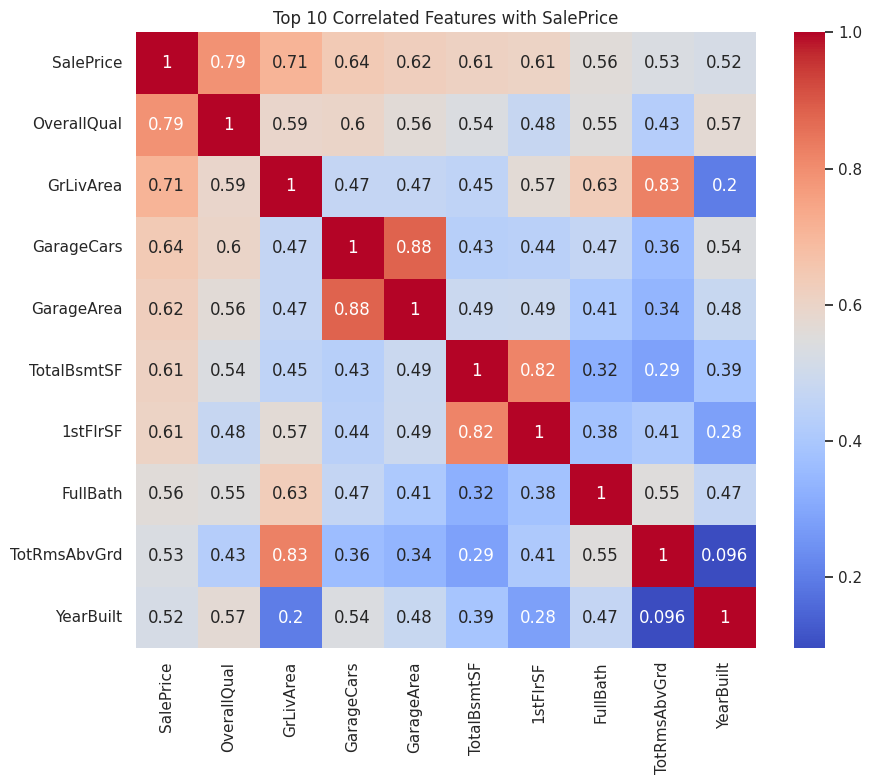

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df[top_corr_features.index].corr(), annot=True, cmap="coolwarm")
plt.title("Top 10 Correlated Features with SalePrice")
plt.show()


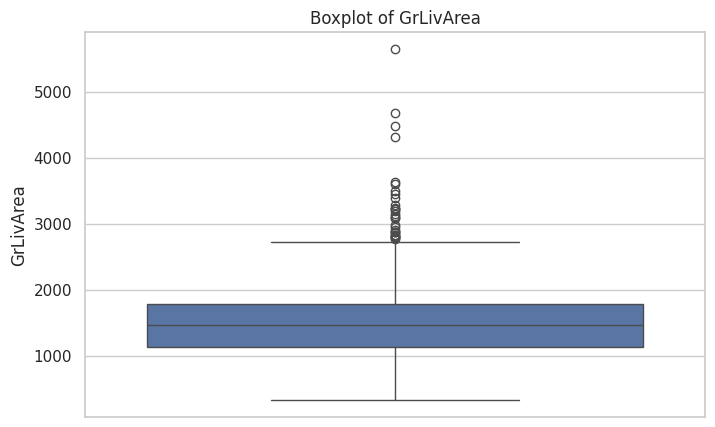

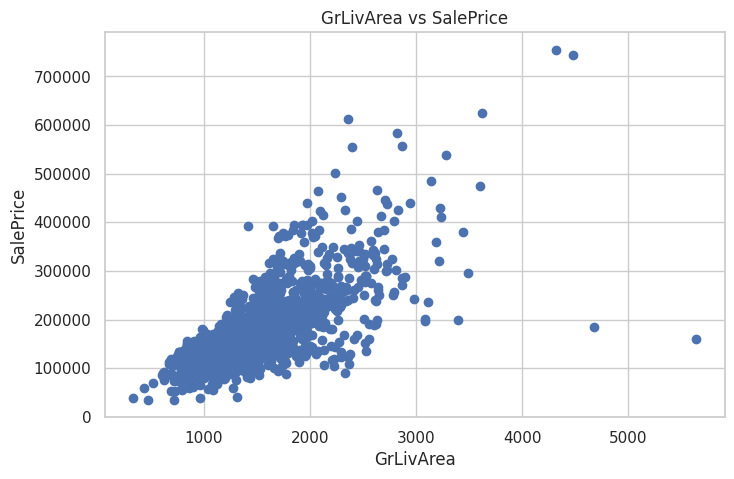

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(df['GrLivArea'])
plt.title("Boxplot of GrLivArea")
plt.show()

# Scatterplot vs. SalePrice
plt.figure(figsize=(8, 5))
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.title("GrLivArea vs SalePrice")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()


In [20]:
# Check how many outliers exist
print(df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000)])

# Remove them
df = df.drop(df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000)].index)

# Confirm shape after removing
print("New shape:", df.shape)


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
523    524          60       RL        130.0    40094   Pave      IR1   
1298  1299          60       RL        313.0    63887   Pave      IR3   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
523          Bnk    AllPub    Inside  ...             0         0           0   
1298         Bnk    AllPub    Corner  ...             0         0           0   

     PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
523         0       0     10    2007       New        Partial     184750  
1298      480       0      1    2008       New        Partial     160000  

[2 rows x 77 columns]
New shape: (1458, 77)


In [21]:
# Get all object (categorical) columns
cat_features = df.select_dtypes(include='object').columns
print("Categorical columns:")
print(cat_features)
print("Total categorical features:", len(cat_features))


Categorical columns:
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
Total categorical features: 39


In [22]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

print("New shape after encoding:", df_encoded.shape)


New shape after encoding: (1458, 248)


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Recalculate correlation matrix with only numeric values
corr_matrix = df_encoded.corr()

# Correlation with SalePrice
top_corr = corr_matrix['SalePrice'].sort_values(ascending=False)
print("Top correlations with SalePrice:")
print(top_corr.head(10))


Top correlations with SalePrice:
SalePrice       1.000000
OverallQual     0.795774
GrLivArea       0.734968
TotalBsmtSF     0.651153
GarageCars      0.641047
1stFlrSF        0.631530
GarageArea      0.629217
FullBath        0.562165
TotRmsAbvGrd    0.537769
YearBuilt       0.523608
Name: SalePrice, dtype: float64


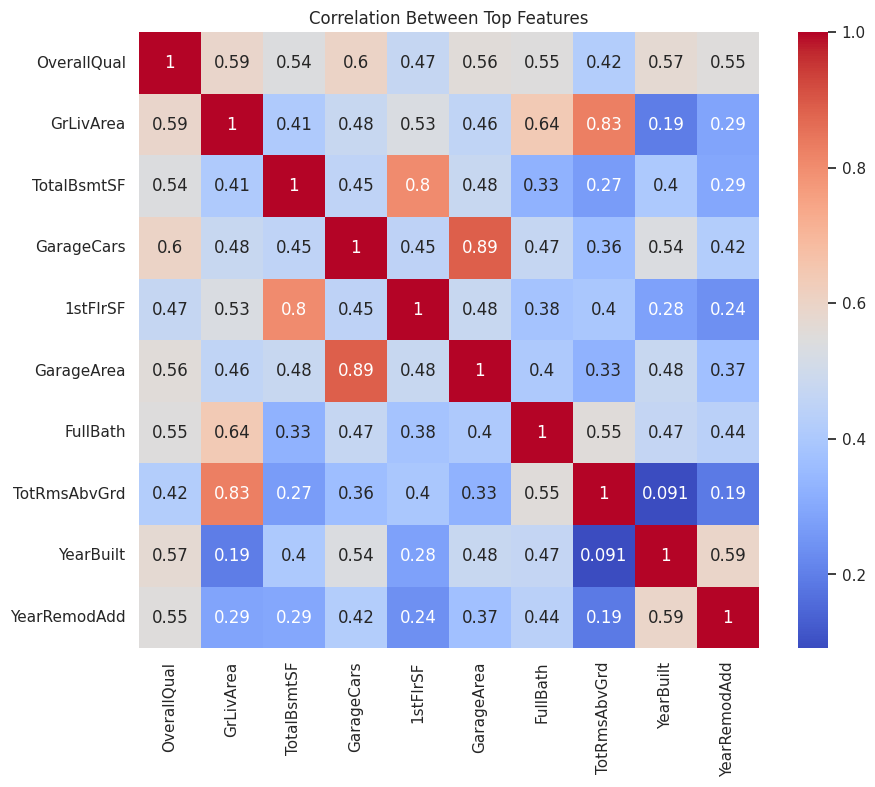

In [24]:
# Plot heatmap of top 10 correlated features with SalePrice
top_features = top_corr.index[1:11]  # skip 'SalePrice' itself
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded[top_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Top Features")
plt.show()


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [27]:
# Step 1: Calculate correlations again
corr_matrix = df.corr(numeric_only=True)
top_corr_features = corr_matrix['SalePrice'].sort_values(ascending=False).head(10)
print(top_corr_features)

# Step 2: Select only those columns
top_features = top_corr_features.index
df_model = df[top_features]


SalePrice       1.000000
OverallQual     0.795774
GrLivArea       0.734968
TotalBsmtSF     0.651153
GarageCars      0.641047
1stFlrSF        0.631530
GarageArea      0.629217
FullBath        0.562165
TotRmsAbvGrd    0.537769
YearBuilt       0.523608
Name: SalePrice, dtype: float64


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_model.drop('SalePrice', axis=1)
y = df_model['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 1008660430.1097864
R² Score: 0.8173949645480425


In [31]:
# Step 1: Select important features (including categorical ones)
selected_features = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    'FullBath', 'YearBuilt', 'YearRemodAdd',
    'Neighborhood', 'KitchenQual', 'ExterQual', 'SalePrice'  # include target
]



In [32]:
df_model2 = df[selected_features]



In [33]:
df_encoded = pd.get_dummies(df_model2, drop_first=True)


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 4: Split into features and target
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

# Step 5: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Predict and evaluate
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 712229179.0326091
R² Score: 0.8710600410159717


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 2: Train the model on the training data
rf_model.fit(X_train, y_train)

# Step 3: Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Step 4: Evaluate model performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R² Score:", r2_rf)


Random Forest - Mean Squared Error: 632749360.9050723
Random Forest - R² Score: 0.8854488428105601


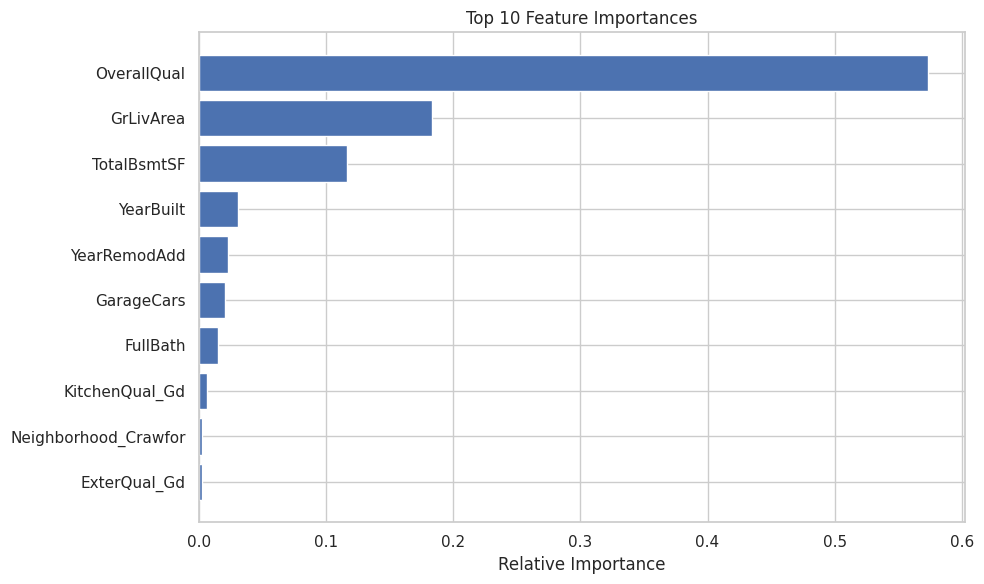

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the model
importances = rf_model.feature_importances_

# Match importances with feature names
features = X.columns
indices = np.argsort(importances)[-10:]  # top 10 features

# Plot
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()


In [37]:
# Save actual vs predicted into a DataFrame
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
print(results.head())

# Optional: Save to CSV
results.to_csv("rf_predictions.csv", index=False)


      Actual      Predicted
1322  190000  197239.900000
837   100000   87366.833333
413   115000  113058.600000
522   159000  175408.000000
1036  315500  306514.460000
